<b>DTSA-5510 Final Project </b>

This dataset contains data on customers and their purchasing patterns.
Therefore, the model will try to analyze their purchases and cluster them into groups with similar characteristics and behaviors (unsupervised learning). This will help the business understand their customers and provide recommendations.<br>
<br>This notebook will explore multiple clustering techniques (K-Means, Agglomerative, Spectral). <br>Since there are no ground truth labels in unsupervised learning, there will be other evalution metrics such as silhouette score, Davies–Bouldin index, and Calinski-Harabasz index, which will offer insights into the performance of clustering algorithms.

You can find the dataset provided by Dr. Omar Romero-Hernandez here:
https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis <br>
The csv file can also be found in my github repository:
https://github.com/martinpolerecky/dtsa5510/final

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

<b>EDA</b>

Let's take a look at the dataset. It contains 2240 entries with 29 columns. Here's a list of all attributes:

<b>People</b> <br>
    ID: Customer's unique identifier<br>
    Year_Birth: Customer's birth year<br>
    Education: Customer's education level<br>
    Marital_Status: Customer's marital status<br>
    Income: Customer's yearly household income<br>
    Kidhome: Number of children in customer's household<br>
    Teenhome: Number of teenagers in customer's household<br>
    Dt_Customer: Date of customer's enrollment with the company<br>
    Recency: Number of days since customer's last purchase<br>
    Complain: 1 if the customer complained in the last 2 years, 0 otherwise<br>

<b>Products</b><br>
    MntWines: Amount spent on wine in last 2 years<br>
    MntFruits: Amount spent on fruits in last 2 years<br>
    MntMeatProducts: Amount spent on meat in last 2 years<br>
    MntFishProducts: Amount spent on fish in last 2 years<br>
    MntSweetProducts: Amount spent on sweets in last 2 years<br>
    MntGoldProds: Amount spent on gold in last 2 years<br>

<b>Promotion</b><br>
    NumDealsPurchases: Number of purchases made with a discount<br>
    AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise<br>
    AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise<br>
    AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise<br>
    AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise<br>
    AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise<br>
    Response: 1 if customer accepted the offer in the last campaign, 0 otherwise<br>

<b>Place</b><br>
    NumWebPurchases: Number of purchases made through the company’s website<br>
    NumCatalogPurchases: Number of purchases made using a catalogue<br>
    NumStorePurchases: Number of purchases made directly in stores<br>
    NumWebVisitsMonth: Number of visits to company’s website in the last month<br>


In [2]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
print(df.shape)

(2240, 29)


In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


<b>Data Cleaning and Feature Engineering</b>

There are a few columns that can be removed from the get-go. There's no information about <i>'Z_Revenue'</i> and <i>'Z_Cost_Contract'</i> and their values are the same for all entries. The <i>'ID'</i> column represents the user's id, which won't be required as this is an unsupervised learning task.
There are also 24 entries where income is not specified. Given that it is a relatively marginal number of entries and no other columns are affected, I've decided to drop those entries altogether.

We also have a few columns which could be turned into binary values instead of strings, such as being in a relationship, having children, or attaining graduate education.
Finally, there are two columns related to dates: <i>'Year_Birth'</i> and </i>'Dt_Customer'</i> which indicate the customer's year of birth and date of account creation respectively. Since the former has high values (1900+), it will instead be turned into age and the latter will be modified from DD/MM/YY to years since creation.

In [6]:
print(df.isna().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [3]:
df = df.dropna()
df = df.drop(columns=['Z_CostContact','Z_Revenue','ID'])

In [8]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [4]:
df['In_Relationship'] = df["Marital_Status"].replace({"Married":1, "Together":1, "Absurd":0, "Widow":0, "YOLO":0, "Divorced":0, "Single":0,"Alone":0})

In [10]:
df['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [5]:
df['Graduate']= df["Education"].replace({"Graduation": 1, "PhD":1, "Master":1, "2n Cycle":0, "Basic":0})

In [6]:
df["Children"]=df["Kidhome"]+df["Teenhome"]

In [7]:
df["Parent"] = np.where(df.Children> 0, 1, 0)

In [8]:
df['Age'] = datetime.now().year - df['Year_Birth'] 

In [9]:
current_year = datetime.now().year
df['Years_Since_Registration'] = current_year - pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y').apply(lambda x: x.year)

In [10]:
df = df.drop(columns=['Kidhome','Teenhome','Marital_Status','Education','Dt_Customer'])

In [11]:
# here the idea is to get the total amount of money spent on the products, alongside the number of accepted campaigns and the number of purchases

# money
mnt_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Sum_Mnt'] = df[mnt_cols].sum(axis=1)

# campaigns
accepted_cmp_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                     'Response']
df['Num_Accepted_Cmp'] = df[accepted_cmp_cols].sum(axis=1) 

# purchases
total_purchases = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df['Num_Total_Purchases'] = df[total_purchases].sum(axis=1)

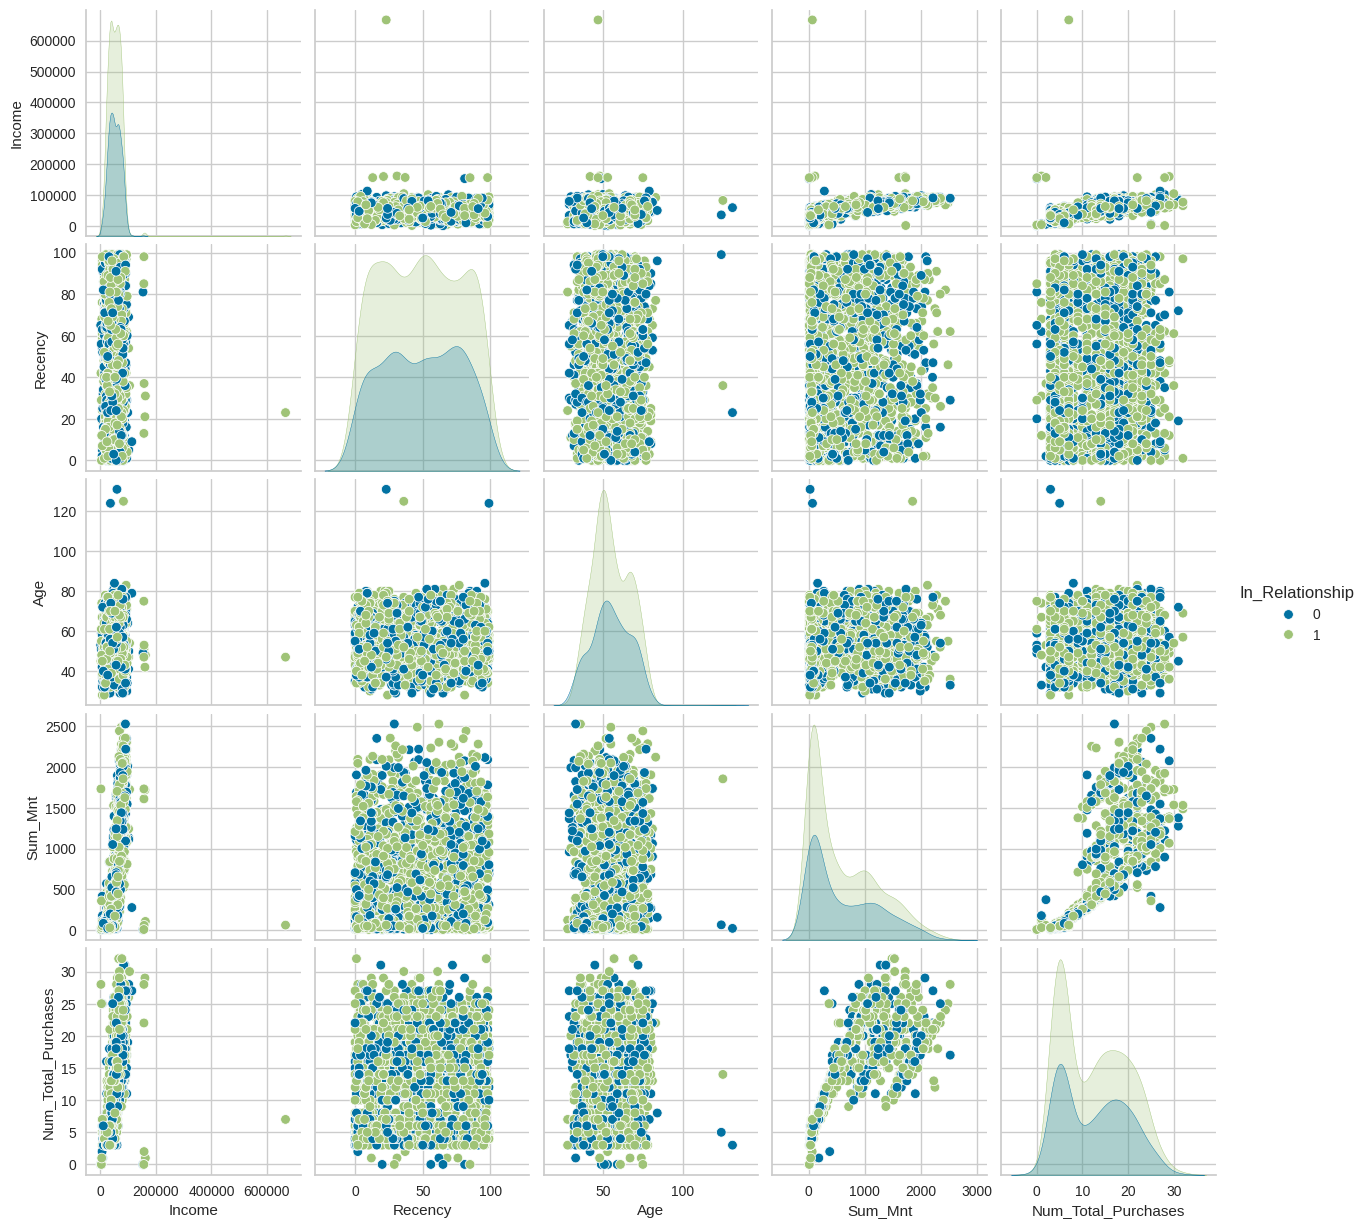

In [18]:
# here are a few graphs, mostly to see the data distributions and potential outliers
to_plot = ['Income', 'Recency', 'Age', 'Sum_Mnt',
           'Num_Total_Purchases', 'In_Relationship']
sns.pairplot(df[to_plot], hue='In_Relationship')
plt.show()

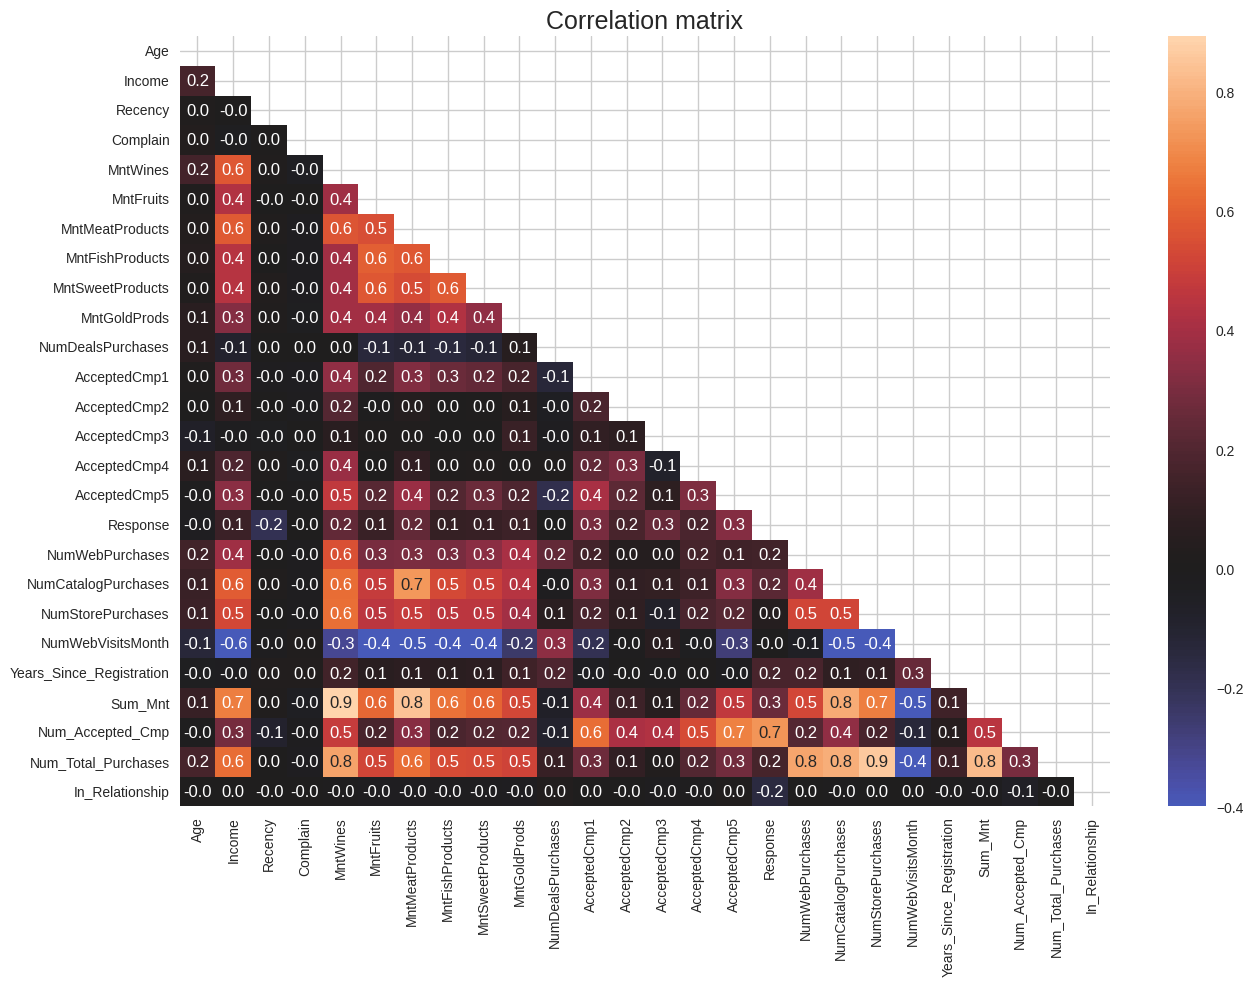

In [25]:
# correlation matrix
to_corr = ['Age', 'Income', 'Recency', 'Complain', 
          'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
          'MntGoldProds', 'NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
          'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'NumWebPurchases', 'NumCatalogPurchases', 
          'NumStorePurchases', 'NumWebVisitsMonth', 'Years_Since_Registration',
           'Sum_Mnt', 'Num_Accepted_Cmp', 'Num_Total_Purchases', 'In_Relationship']


matrix = np.triu(df[to_corr].corr())
plt.figure(figsize=(15, 10))
plt.title('Correlation matrix', fontsize=18)
sns.heatmap(df[to_corr].corr(), annot=True,
            fmt='.1f', vmin=-0.4, center=0, mask=matrix)

plt.show()

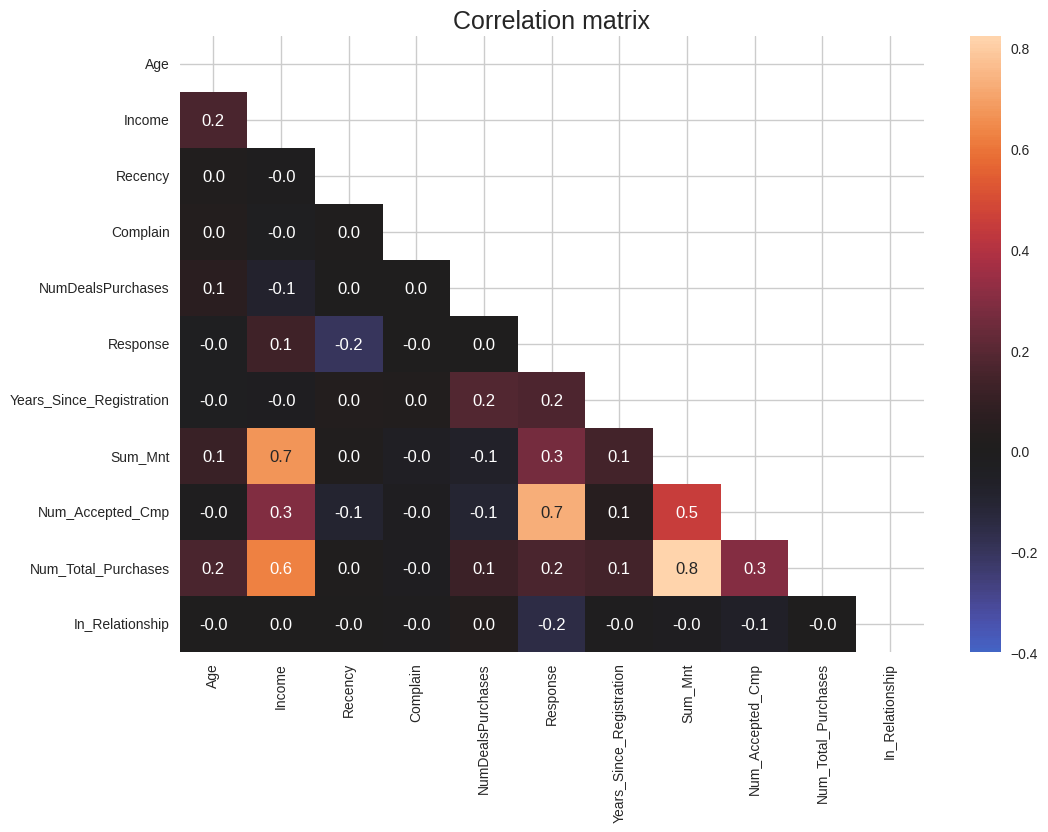

In [24]:
# simplified correlation matrix
to_corr = ['Age', 'Income', 'Recency', 'Complain', 
           'NumDealsPurchases', 'Response', 'Years_Since_Registration',
           'Sum_Mnt', 'Num_Accepted_Cmp', 'Num_Total_Purchases', 'In_Relationship']

matrix = np.triu(df[to_corr].corr())
plt.figure(figsize=(12, 8))
plt.title('Correlation matrix', fontsize=18)
sns.heatmap(df[to_corr].corr(), annot=True,
            fmt='.1f', vmin=-0.4, center=0, mask=matrix)

plt.show()

In [12]:
''' 
As you may have already noticed from the plots above, the dataset is somewhat dated and certain customers would be over 100 years old by now.
There are a couple high net worth individuals which may skew the models. Therefore, these outliers get removed
'''
def remove_outliers(data, column):
    q3, q1 = np.nanpercentile(data[column], [75, 25])
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    data = data[(data[column] > lower_bound) & (data[column] < upper_bound)]

    return data

df = remove_outliers(df, 'Age')
df = remove_outliers(df, 'Income')

In [13]:
df = df.drop(columns=[
          'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
          'MntGoldProds', 'NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
          'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'NumWebPurchases', 'NumCatalogPurchases', 
          'NumStorePurchases', 'NumWebVisitsMonth', 'Year_Birth'])

In [14]:
# a simple function to scale the data, useful for PCA
def scale(df):
    scaler = StandardScaler()
    return pd.DataFrame(data=scaler.fit_transform(df), columns=df.columns)

df_scaled = scale(df)
df_scaled.index = df.index

In [15]:
# cluster performance metrics, outer list for the algorithm, inner list for the metric (silhouette, davies-bouldin, calinski-harabasz)
performance =[]

In [16]:
#pca
pca = PCA(n_components=3)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)


/home/martin/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/martin/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/martin/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/martin/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

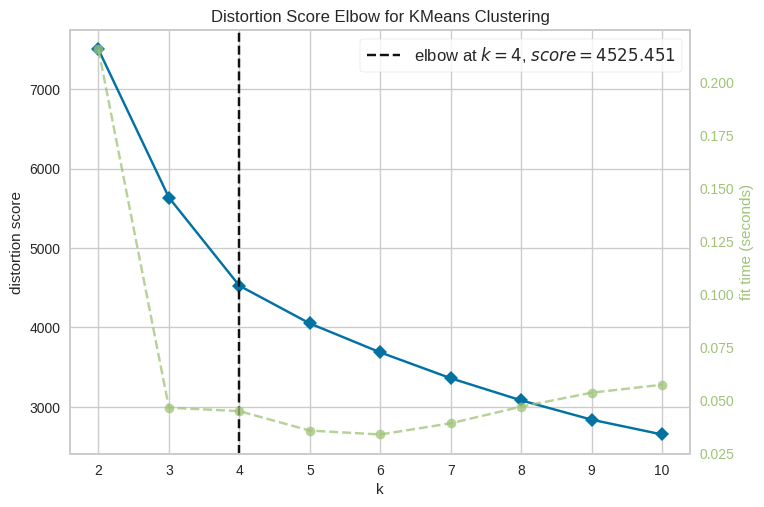

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
# elbow method to determine the optimal number of clusters
model = KMeans()
visualizer = KElbowVisualizer(model, k=10)
visualizer.fit(df_pca)
visualizer.show()

In [ ]:
# K-means clustering, using llloyd and elkan algorithms
algorithms = ['lloyd','elkan']
best_silh_score = 0
best_algo = ''
for algo in algorithms:
    kmeans = KMeans(n_clusters=4, algorithm=algo)
    kmeans.fit(df_pca)
    if metrics.silhouette_score(df_pca, kmeans.labels_) > best_silh_score:
        best_silh_score = metrics.silhouette_score(df_pca, kmeans.labels_)
        best_algo = algo

print(f'Best algorithm: {best_algo}')
kmeans = KMeans(n_clusters=4, algorithm=best_algo)
kmeans.fit(df_pca)
df['Cluster_K'] = kmeans.labels_
performance.append([metrics.silhouette_score(df_pca, kmeans.labels_), metrics.davies_bouldin_score(df_pca, kmeans.labels_), metrics.calinski_harabasz_score(df_pca, kmeans.labels_)])


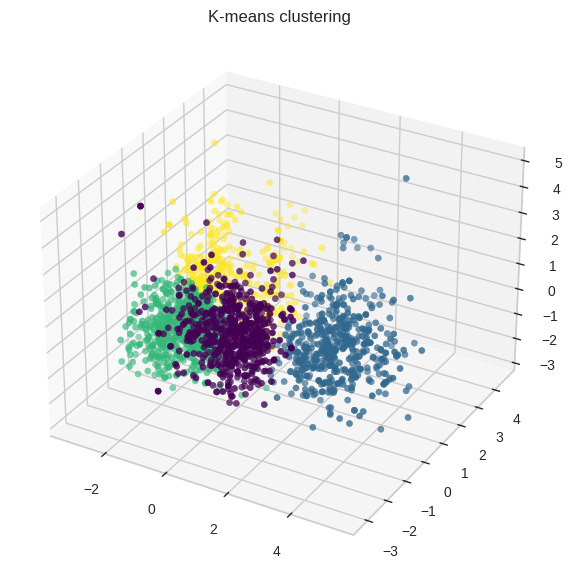

In [19]:
# plot k means results in 3d
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=kmeans.labels_, cmap='viridis')
ax.set_title('K-means clustering')
plt.show()

In [20]:

print(df['Cluster_K'].value_counts())
df.groupby('Cluster_K').mean()


Cluster_K
2    727
0    609
1    506
3    363
Name: count, dtype: int64


,Income,Recency,Complain,In_Relationship,Graduate,Children,Parent,Age,Years_Since_Registration,Sum_Mnt,Num_Accepted_Cmp,Num_Total_Purchases
Cluster_K,,,,,,,,,,,,
0,60771.354680,52.141215,0.018062,0.681445,0.965517,1.200328,0.977011,59.712644,11.206897,829.016420,0.366174,17.986864
1,75465.013834,48.725296,0.001976,0.590909,0.915020,0.031621,0.031621,55.814229,10.958498,1376.628458,1.144269,19.124506
2,38452.348006,45.394773,0.001376,0.654746,0.987620,1.460798,0.982118,55.396149,10.671252,117.913343,0.163686,6.484182
3,29412.699725,51.388430,0.019284,0.639118,0.506887,0.779614,0.694215,45.746556,11.201102,140.148760,0.198347,6.531680


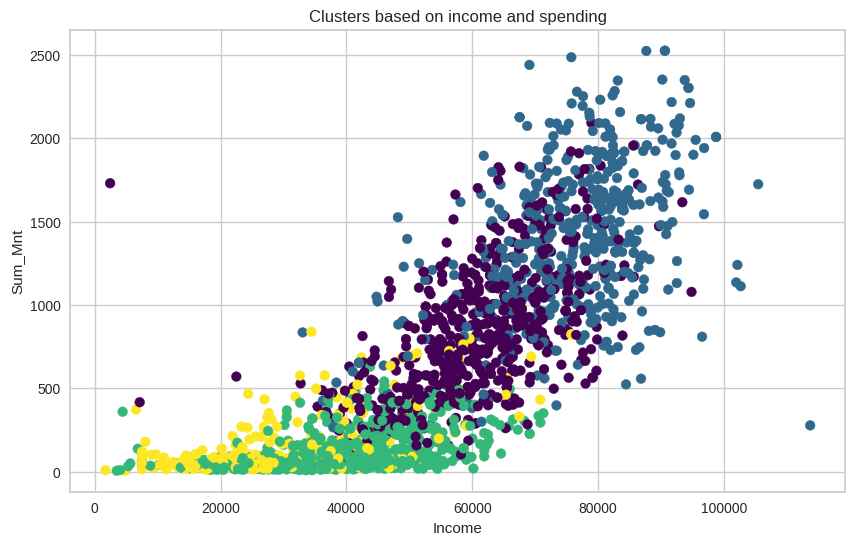

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Income'], df['Sum_Mnt'], c=df['Cluster_K'], cmap='viridis')
plt.xlabel('Income')
plt.ylabel('Sum_Mnt')
plt.title('Clusters based on income and spending')
plt.show()

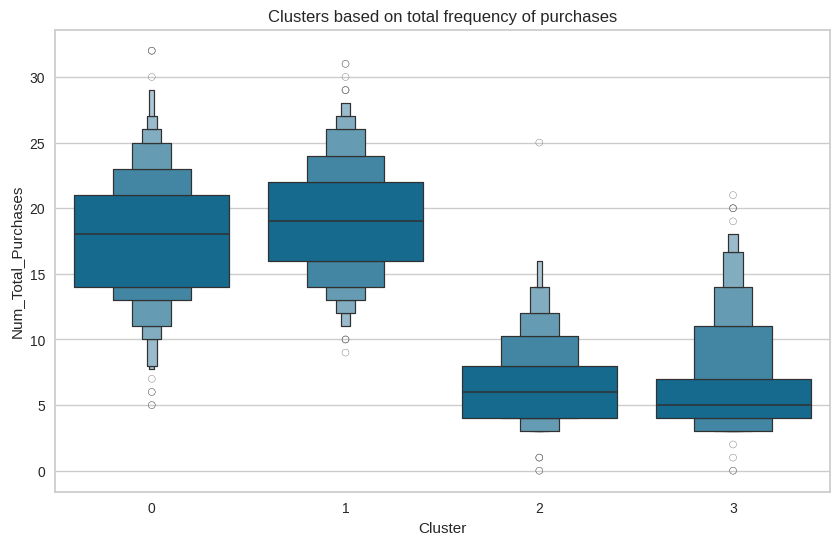

In [22]:
# plot the clusters based on total frequency of purchases using boxplot
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Cluster_K', y='Num_Total_Purchases', data=df)
plt.xlabel('Cluster')
plt.ylabel('Num_Total_Purchases')
plt.title('Clusters based on total frequency of purchases')
plt.show()

In [23]:
# Agglomerative clustering
linkage = ['ward', 'complete', 'average', 'single']
best_model = None
best_score = -1
for link in linkage:
    model = AgglomerativeClustering(linkage=link, n_clusters=4)
    model.fit(df_pca)
    score = metrics.silhouette_score(df_pca, model.labels_)
    if score > best_score:
        best_score = score
        best_model = model

df['Cluster_A'] = best_model.labels_
performance.append([metrics.silhouette_score(df_pca, best_model.labels_), metrics.davies_bouldin_score(df_pca, best_model.labels_), metrics.calinski_harabasz_score(df_pca, best_model.labels_)])

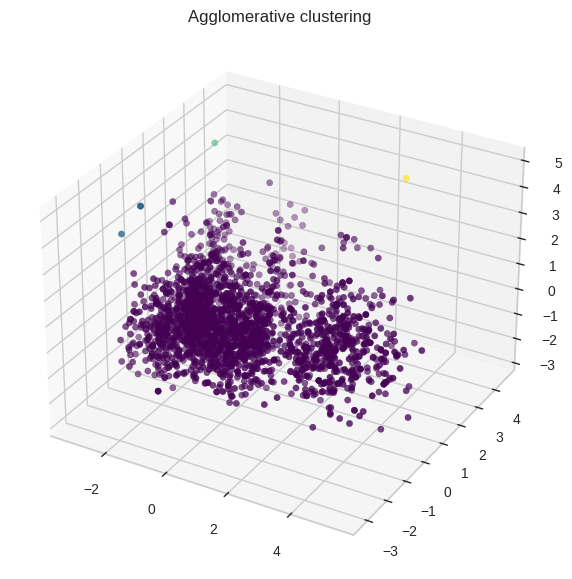

In [24]:
# plot the results in 3d using different colors for each cluster
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=df['Cluster_A'], cmap='viridis')  
ax.set_title('Agglomerative clustering')
plt.show()

In [25]:
print(df['Cluster_A'].value_counts())
df.groupby('Cluster_A').mean()

Cluster_A
0    2200
1       3
2       1
3       1
Name: count, dtype: int64


,Income,Recency,Complain,In_Relationship,Graduate,Children,Parent,Age,Years_Since_Registration,Sum_Mnt,Num_Accepted_Cmp,Num_Total_Purchases,Cluster_K
Cluster_A,,,,,,,,,,,,,
0,51640.431818,48.972727,0.006818,0.644545,0.886364,0.947273,0.715,55.100455,10.970455,607.444545,0.45,12.575455,1.384091
1,39598.666667,87.000000,1.000000,1.000000,1.000000,2.333333,1.000,66.666667,11.666667,69.000000,0.00,5.333333,0.000000
2,15716.000000,8.000000,1.000000,1.000000,0.000000,1.000000,1.000,36.000000,12.000000,92.000000,0.00,7.000000,3.000000
3,83257.000000,56.000000,1.000000,0.000000,0.000000,0.000000,0.000,29.000000,12.000000,1365.000000,3.00,27.000000,1.000000


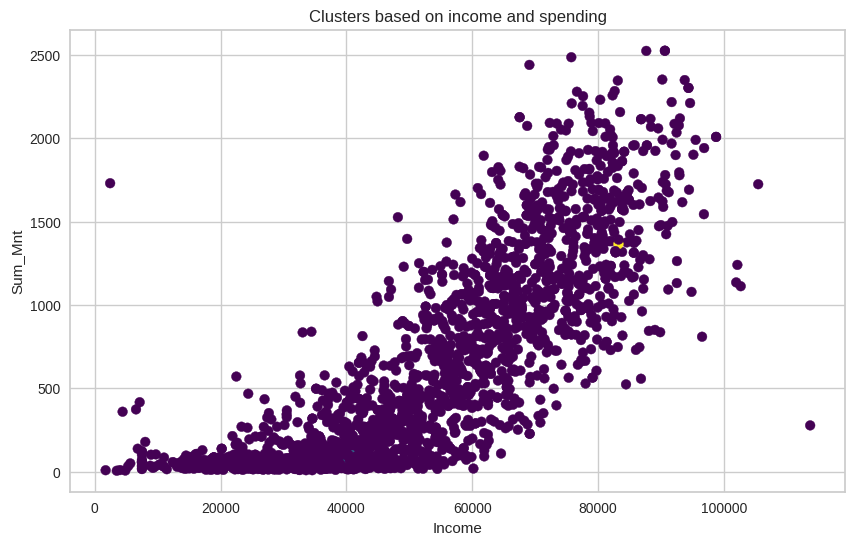

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Income'], df['Sum_Mnt'], c=df['Cluster_A'], cmap='viridis')
plt.xlabel('Income')
plt.ylabel('Sum_Mnt')
plt.title('Clusters based on income and spending')
plt.show()

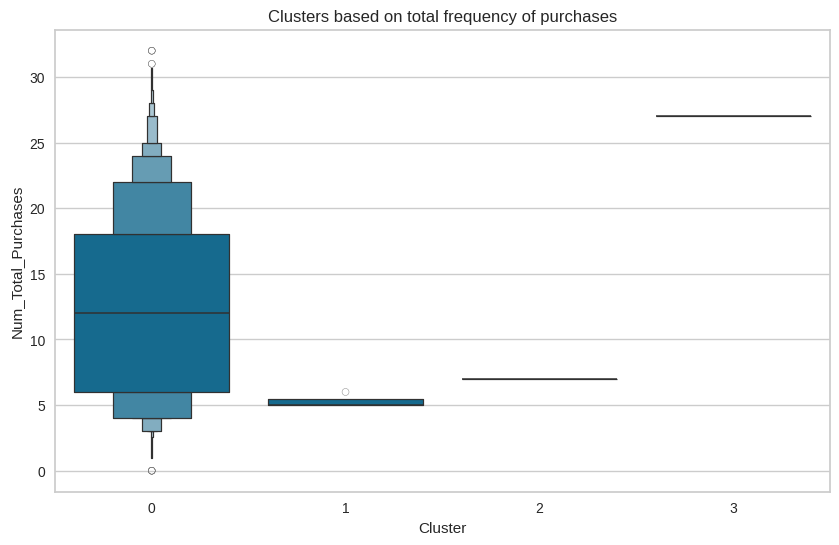

In [27]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Cluster_A', y='Num_Total_Purchases', data=df)
plt.xlabel('Cluster')
plt.ylabel('Num_Total_Purchases')
plt.title('Clusters based on total frequency of purchases')
plt.show()

In [28]:
sc = SpectralClustering(n_clusters=4)
sc.fit(df_pca)
df['Cluster_S'] = sc.labels_
performance.append([metrics.silhouette_score(df_pca, sc.labels_), metrics.davies_bouldin_score(df_pca, sc.labels_), metrics.calinski_harabasz_score(df_pca, sc.labels_)])

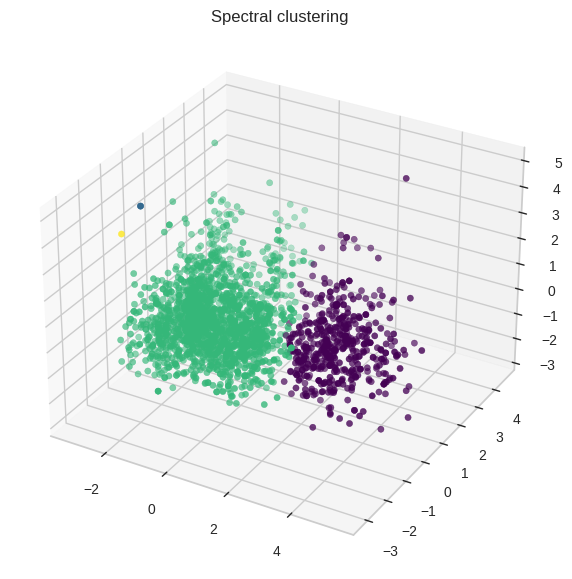

In [29]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=df['Cluster_S'], cmap='viridis')  
ax.set_title('Spectral clustering')
plt.show()

In [30]:
print(df['Cluster_S'].value_counts())
df.groupby('Cluster_S').mean()

Cluster_S
2    1706
0     496
1       2
3       1
Name: count, dtype: int64


,Income,Recency,Complain,In_Relationship,Graduate,Children,Parent,Age,Years_Since_Registration,Sum_Mnt,Num_Accepted_Cmp,Num_Total_Purchases,Cluster_K,Cluster_A
Cluster_S,,,,,,,,,,,,,,
0,75512.743952,48.961694,0.002016,0.58871,0.911290,0.020161,0.020161,55.671371,10.975806,1383.721774,1.149194,19.207661,1.012097,0.006048
1,38998.000000,92.000000,1.000000,1.00000,1.000000,2.000000,1.000000,70.000000,12.000000,54.000000,0.000000,5.000000,0.000000,1.000000
2,44697.304807,48.956038,0.009379,0.66061,0.878077,1.216295,0.916764,54.907972,10.970106,381.892732,0.247948,10.652403,1.492966,0.001172
3,40800.000000,77.000000,1.000000,1.00000,1.000000,3.000000,1.000000,60.000000,11.000000,99.000000,0.000000,6.000000,0.000000,1.000000


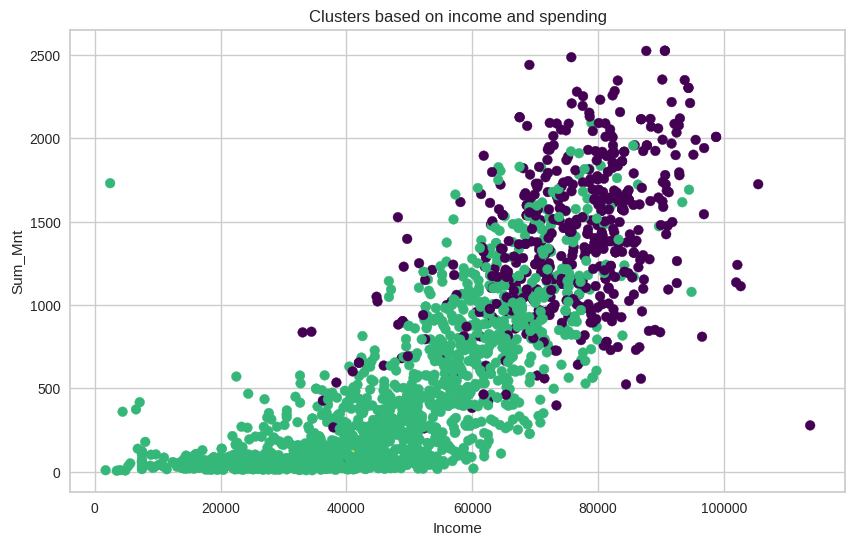

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Income'], df['Sum_Mnt'], c=df['Cluster_S'], cmap='viridis')
plt.xlabel('Income')
plt.ylabel('Sum_Mnt')
plt.title('Clusters based on income and spending')
plt.show()

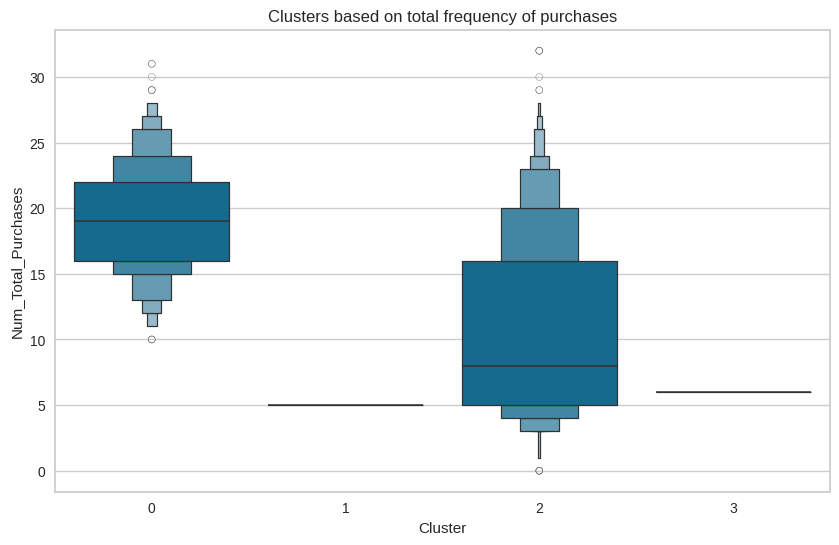

In [32]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Cluster_S', y='Num_Total_Purchases', data=df)
plt.xlabel('Cluster')
plt.ylabel('Num_Total_Purchases')
plt.title('Clusters based on total frequency of purchases')
plt.show()

<b> Performance Evaluation </b><br><br>
I've decided to use three common clustering evaluation metrics. First up, the <i> Silhouette score </i> defines how well the clusters are separated from one another on a scale of -1 to 1. Values close to 1 suggest that an object is well matched to its own cluster. On the other hand, a score close to -1 indicates that the object may be in an incorrect cluster. However, due to the curse of dimensionality, it may be difficult to achieve higher values.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html<br><br>
The <i>Davies-Bouldin score</i> is a metric defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score. Here, lower values indicate better clustering.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html<br><br>
Finally, there's the <i>Calinski-Harabasz score</i> (a.k.a variance ratio) which compares the ratio of between-cluster variance to within-cluster variance. Higher values indicate better cluster definition.<br>https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html

In [33]:
switcher = {
        0: 'K-means',
        1: 'Agglomerative',
        2: 'Spectral'
    }
for i in range(3):
    print(f'{switcher.get(i)} clustering performance:')
    print(f'Silhouette score: {performance[i][0]}')
    print(f'Davies-Bouldin score: {performance[i][1]}')
    print(f'Calinski-Harabasz score: {performance[i][2]}')
    print('\n')

K-means clustering performance:
Silhouette score: 0.32735608224354756
Davies-Bouldin score: 1.088906778798904
Calinski-Harabasz score: 1436.9096297236533


Agglomerative clustering performance:
Silhouette score: 0.3732839390720188
Davies-Bouldin score: 0.4509471795742224
Calinski-Harabasz score: 8.979381500338832


Spectral clustering performance:
Silhouette score: 0.3656770264026639
Davies-Bouldin score: 0.6352675146220961
Calinski-Harabasz score: 490.7686578068744




<b>Analysis of results & cluster characteristics </b><br><br>
Considering the performance metrics above, Agglomerative clustering turns out to have both the best Silhouette score, slightly edging out K-Means and the best Davis-Bouldin score, but falls short to the other two algorithms in the Calinski-Harabasz score. <br>
Conversely, K-Means has the highest Calinski-Harabasz score, but is somewhat worse in terms of Silhouette score. Soectral clustering falls in the middle.<br>
Given how unevenly the clusters are distributed in both agglomerative and spectral clustering, the results are likely skewed so I'll just focus on evaluating K-Means: <br><br>
<b> Group A </b> corresponding to K-Means #0<br><br>
&emsp; medium- high income<br> &emsp;at least 1 child<br>&emsp; older <br>&emsp; high spenders<br>&emsp; high number of purchases<br><br>
<b> Group B </b> corresponding to K-Means #1<br><br>
&emsp; high income<br>&emsp; likely a graduate <br>&emsp; no children <br>&emsp; spends often and in bulk<br>&emsp; likely to accept one or more campaign offers<br><br>
<b> Group C </b> corresponding to K-Means #2 <br><br>
&emsp;low income<br>&emsp; graduate<br>&emsp;  one or more children in the household<br>&emsp; infrequent shopper<br>&emsp; unlikely to accept campaign offers<br><br>
<b> Group D </b> corresponding to K-Means #3 <br><br>
&emsp;low income<br>&emsp; likely without a graduate degree<br>&emsp; unliekly to accept campaign offers <br>&emsp; younger <br>&emsp;infrequent shopper <br><br>